  
 <font color =orange size =12><center>-:MACHINE LEARNING:-

 <font color =black size =6>Problem statement

In [4]:
#predict the heart deases is 

#   <font color =black size =6>Data Gathering

In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('heartt.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#   <font color =red size =6>Exploratory Data Analysis

# 1.Age

<Axes: ylabel='Age'>

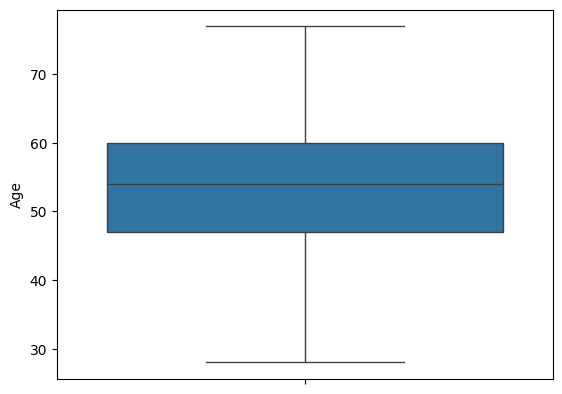

In [9]:
import seaborn as sns
sns.boxplot(df["Age"])

# 2.Sex

In [10]:
df["Sex"].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [11]:
df["Sex"].replace({"M":1,"F":0},inplace=True)


# 3.ChestPainType

In [12]:
df["ChestPainType"].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [13]:
df["ChestPainType"].replace({"TA":1,"ATA":2,"NAP":3,"ASY":4},inplace=True)


In [14]:
#1: typical angina(TA) ,2: atypical angina(ATA),3: non-anginal pain(NAP) ,4: asymptomatic(ASY)

# 4.RestingBP

<Axes: ylabel='RestingBP'>

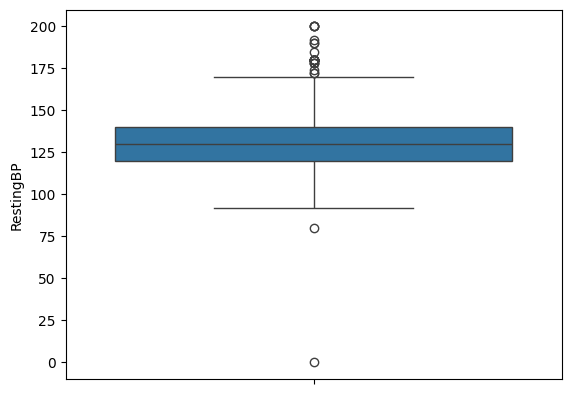

In [15]:
sns.boxplot(df["RestingBP"])

upper_tail 170.0
lower_tail 110.0


<Axes: ylabel='RestingBP'>

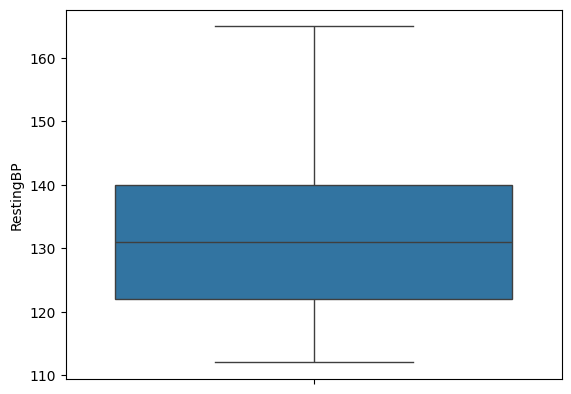

In [16]:
q1=df["RestingBP"].quantile(0.25)
q3=df["RestingBP"].quantile(0.75)
upper_tail=q3+1.5*(q3-q1)
print("upper_tail",upper_tail)
lower_tail=q3-1.5*(q3-q1)
print("lower_tail",lower_tail)
df=df.loc[(df["RestingBP"]<upper_tail)&(df["RestingBP"]>lower_tail)]
sns.boxplot(df["RestingBP"])

# 5.Cholesterol

<Axes: ylabel='Cholesterol'>

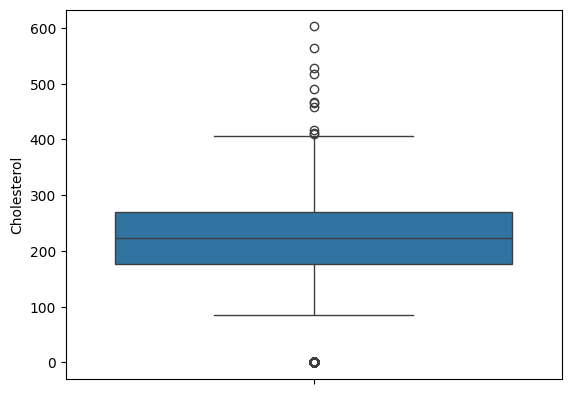

In [17]:
sns.boxplot(df["Cholesterol"])

upper_tail 407.0
lower_tail 131.0


<Axes: ylabel='Cholesterol'>

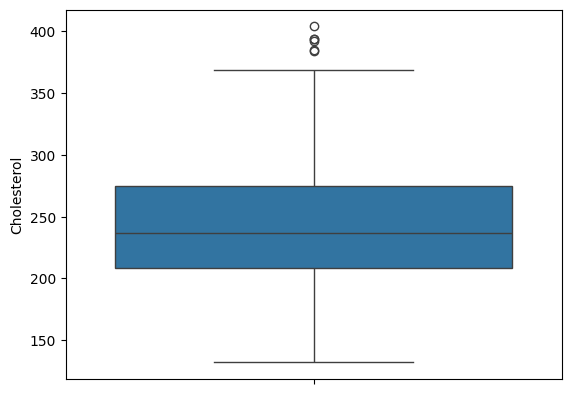

In [18]:
q1=df["Cholesterol"].quantile(0.25)
q3=df["Cholesterol"].quantile(0.75)
upper_tail=q3+1.5*(q3-q1)
print("upper_tail",upper_tail)
lower_tail=q3-1.5*(q3-q1)
print("lower_tail",lower_tail)
df=df.loc[(df["Cholesterol"]<upper_tail)&(df["Cholesterol"]>lower_tail)]
sns.boxplot(df["Cholesterol"])

# 6.FastingBS

In [19]:
df["FastingBS"].value_counts()

FastingBS
0    509
1    103
Name: count, dtype: int64

# 7.RestingECG

In [20]:
df["RestingECG"].value_counts()

RestingECG
Normal    364
LVH       143
ST        105
Name: count, dtype: int64

In [21]:
df["RestingECG"].replace({"Normal":0,"LVH":1,"ST":2},inplace=True)

In [22]:
# df_RestingECG=pd.get_dummies(df["RestingECG"])
# df_RestingECG

# 8.MaxHR

<Axes: ylabel='MaxHR'>

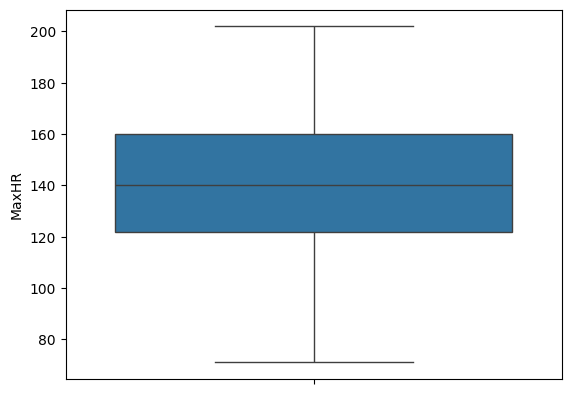

In [23]:
sns.boxplot(df["MaxHR"])

# 9.ExerciseAngina

In [24]:
df["ExerciseAngina"].value_counts()

ExerciseAngina
N    375
Y    237
Name: count, dtype: int64

In [25]:
df["ExerciseAngina"].replace({"N":0,"Y":1},inplace=True)

# 10.Oldpeak

<Axes: ylabel='Oldpeak'>

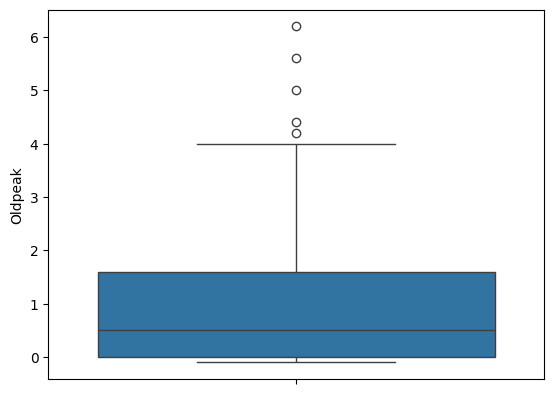

In [26]:
sns.boxplot(df["Oldpeak"])

upper_tail 4.0
lower_tail -0.8000000000000003


<Axes: ylabel='Oldpeak'>

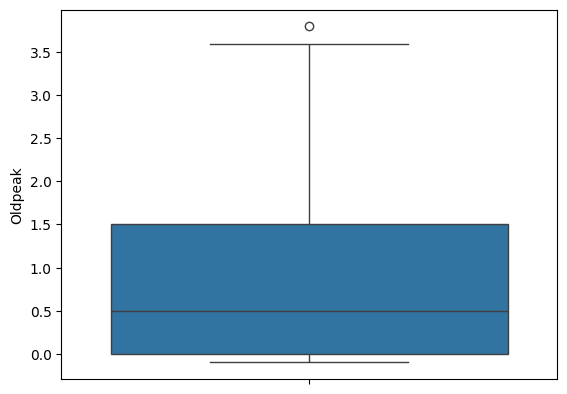

In [27]:
q1=df["Oldpeak"].quantile(0.25)
q3=df["Oldpeak"].quantile(0.75)
upper_tail=q3+1.5*(q3-q1)
print("upper_tail",upper_tail)
lower_tail=q3-1.5*(q3-q1)
print("lower_tail",lower_tail)
df=df.loc[(df["Oldpeak"]<upper_tail)]
sns.boxplot(df["Oldpeak"])

In [28]:
df['Oldpeak'].var()

np.float64(0.9334005546311702)

# 11.ST_Slope

In [29]:
df["ST_Slope"].value_counts()

ST_Slope
Flat    288
Up      287
Down     26
Name: count, dtype: int64

In [30]:
df["ST_Slope"].replace({"Down":0,"Flat":1,"Up":2},inplace=True)

#   <font color =red size =6>Feature Scaling

In [31]:
x = df.drop('HeartDisease',axis = 1)
y = df['HeartDisease']

In [32]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [33]:
normal_scaler = MinMaxScaler()
x_scaled = normal_scaler.fit_transform(x)
x_normal_df = pd.DataFrame(x_scaled,columns= x.columns)
x_normal_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,1.0,0.333333,0.528302,0.577206,0.0,0.0,0.770992,0.0,0.025641,1.0
1,0.428571,0.0,0.666667,0.905660,0.176471,0.0,0.0,0.648855,0.0,0.282051,0.5
2,0.183673,1.0,0.333333,0.339623,0.555147,0.0,1.0,0.206107,0.0,0.025641,1.0
3,0.408163,0.0,1.000000,0.490566,0.301471,0.0,0.0,0.282443,1.0,0.410256,0.5
4,0.530612,1.0,0.666667,0.716981,0.231618,0.0,0.0,0.389313,0.0,0.025641,1.0
...,...,...,...,...,...,...,...,...,...,...,...
596,0.632653,1.0,1.000000,0.981132,0.161765,1.0,0.5,0.145038,0.0,0.282051,0.5
597,0.591837,0.0,1.000000,0.528302,0.400735,0.0,0.0,0.396947,1.0,0.076923,0.5
598,0.816327,1.0,1.000000,0.603774,0.224265,1.0,0.0,0.534351,0.0,0.897436,0.5
599,0.591837,0.0,0.333333,0.339623,0.382353,0.0,0.5,0.786260,0.0,0.025641,0.5


In [34]:
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)
x_std_df = pd.DataFrame(x_scaled,columns= x.columns)
x_std_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.380713,0.556209,-1.189520,0.481819,0.940110,-0.452116,-0.746151,1.277831,-0.781831,-0.886826,0.981528
1,-0.420657,-1.797886,-0.139738,2.100452,-1.279913,-0.452116,-0.746151,0.628551,-0.781831,0.149097,-0.753467
2,-1.700732,0.556209,-1.189520,-0.327497,0.817907,-0.452116,1.883977,-1.725089,-0.781831,-0.886826,0.981528
3,-0.527330,-1.797886,0.910044,0.319956,-0.587429,-0.452116,-0.746151,-1.319289,1.279048,0.667059,-0.753467
4,0.112708,0.556209,-0.139738,1.291136,-0.974405,-0.452116,-0.746151,-0.751169,-0.781831,-0.886826,0.981528
...,...,...,...,...,...,...,...,...,...,...,...
596,0.646072,0.556209,0.910044,2.424179,-1.361382,2.211822,0.568913,-2.049729,-0.781831,0.149097,-0.753467
597,0.432726,-1.797886,0.910044,0.481819,-0.037515,-0.452116,-0.746151,-0.710589,1.279048,-0.679641,-0.753467
598,1.606128,0.556209,0.910044,0.805546,-1.015140,2.211822,-0.746151,0.019851,-0.781831,2.635313,-0.753467
599,0.432726,-1.797886,-1.189520,-0.327497,-0.139351,-0.452116,0.568913,1.358991,-0.781831,-0.886826,-0.753467


# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [36]:
x_train, x_test,y_train, y_test = train_test_split(x_std_df,y, test_size=0.2, random_state=10, stratify=y)

#   <font color =red size =6>Model Training

In [37]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [38]:
knn_model = KNeighborsClassifier(n_neighbors=12,p = 1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12, p=1)

#   <font color =red size =6>Model Evaluation

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

# Evaluation on Testing Data

In [41]:
y_pred = knn_model.predict(x_test)
conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix on Testing data is :\n",conf_matrix)

clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)

acc_score = accuracy_score(y_test,y_pred)
print("Accuracy score :",acc_score)

Confusion Matrix on Testing data is :
 [[57  7]
 [10 47]]
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.89      0.87        64
           1       0.87      0.82      0.85        57

    accuracy                           0.86       121
   macro avg       0.86      0.86      0.86       121
weighted avg       0.86      0.86      0.86       121

Accuracy score : 0.859504132231405


Note: you may need to restart the kernel to use updated packages.


In [59]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn_model, x_test, y_test)


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\GB Tech\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\__init__.py)

# Evaluation on Training Data

In [54]:
y_pred_train = knn_model.predict(x_train)
conf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix on Training data is :\n",conf_matrix)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)
acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy score :",acc_score)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [51]:
plot_confusion_matrix(knn_model,x_train,y_train)

NameError: name 'plot_confusion_matrix' is not defined

# Hyperparamater Tuning

# 1. GridSearchCV

In [52]:
knn_model = KNeighborsClassifier()

parameters = {'n_neighbors': np.arange(2,30),
              'p':[1,2]}

gscv_knn_model = GridSearchCV(knn_model,parameters,cv = 5)
gscv_knn_model.fit(x_train,y_train)
gscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=np.int64(19), p=1)

# 2. RandomizedSearchCV

In [53]:
knn_model = KNeighborsClassifier()

parameters = {'n_neighbors': np.arange(2,30),
              'p':[1,2]}

rscv_knn_model = RandomizedSearchCV(knn_model,parameters,cv = 5)
rscv_knn_model.fit(x_train,y_train)
rscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=np.int64(19), p=1)

# Elbow Method

In [46]:
import matplotlib.pyplot as plt

In [47]:
acc_score_list = []
error_rate_list = []
k = range(2,50)
for i in k:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)
    acc_score_list.append(acc_score)
    error_rate_list.append(np.mean(y_test != y_pred))

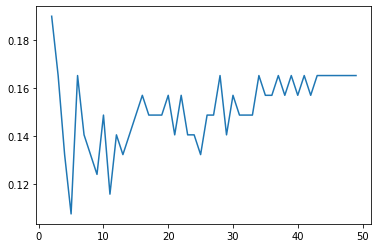

In [48]:
plt.plot(k,error_rate_list)

In [49]:
y_pred_proba = knn_model.predict_proba(x_test)
y_pred_proba

array([[0.2244898 , 0.7755102 ],
       [0.51020408, 0.48979592],
       [0.59183673, 0.40816327],
       [0.79591837, 0.20408163],
       [0.83673469, 0.16326531],
       [0.24489796, 0.75510204],
       [0.04081633, 0.95918367],
       [0.75510204, 0.24489796],
       [0.20408163, 0.79591837],
       [0.79591837, 0.20408163],
       [0.7755102 , 0.2244898 ],
       [0.08163265, 0.91836735],
       [0.85714286, 0.14285714],
       [0.3877551 , 0.6122449 ],
       [1.        , 0.        ],
       [0.32653061, 0.67346939],
       [0.02040816, 0.97959184],
       [0.2244898 , 0.7755102 ],
       [0.71428571, 0.28571429],
       [0.10204082, 0.89795918],
       [0.85714286, 0.14285714],
       [0.10204082, 0.89795918],
       [0.89795918, 0.10204082],
       [0.51020408, 0.48979592],
       [0.02040816, 0.97959184],
       [0.06122449, 0.93877551],
       [0.16326531, 0.83673469],
       [0.93877551, 0.06122449],
       [0.10204082, 0.89795918],
       [0.20408163, 0.79591837],
       [0.

In [50]:
y_pred = knn_model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [51]:
y_pred_proba = knn_model.predict_proba(x_test)
y_pred_proba

array([[0.2244898 , 0.7755102 ],
       [0.51020408, 0.48979592],
       [0.59183673, 0.40816327],
       [0.79591837, 0.20408163],
       [0.83673469, 0.16326531],
       [0.24489796, 0.75510204],
       [0.04081633, 0.95918367],
       [0.75510204, 0.24489796],
       [0.20408163, 0.79591837],
       [0.79591837, 0.20408163],
       [0.7755102 , 0.2244898 ],
       [0.08163265, 0.91836735],
       [0.85714286, 0.14285714],
       [0.3877551 , 0.6122449 ],
       [1.        , 0.        ],
       [0.32653061, 0.67346939],
       [0.02040816, 0.97959184],
       [0.2244898 , 0.7755102 ],
       [0.71428571, 0.28571429],
       [0.10204082, 0.89795918],
       [0.85714286, 0.14285714],
       [0.10204082, 0.89795918],
       [0.89795918, 0.10204082],
       [0.51020408, 0.48979592],
       [0.02040816, 0.97959184],
       [0.06122449, 0.93877551],
       [0.16326531, 0.83673469],
       [0.93877551, 0.06122449],
       [0.10204082, 0.89795918],
       [0.20408163, 0.79591837],
       [0.

In [52]:
from sklearn.metrics import roc_auc_score,roc_curve,multilabel_confusion_matrix

In [53]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_proba[:,1])

In [54]:
fpr

array([0.      , 0.      , 0.015625, 0.015625, 0.015625, 0.015625,
       0.03125 , 0.03125 , 0.046875, 0.046875, 0.046875, 0.046875,
       0.046875, 0.0625  , 0.09375 , 0.09375 , 0.109375, 0.109375,
       0.125   , 0.125   , 0.140625, 0.140625, 0.171875, 0.203125,
       0.21875 , 0.21875 , 0.265625, 0.296875, 0.40625 , 0.421875,
       0.453125, 0.578125, 0.640625, 0.734375, 0.96875 , 1.      ])

In [55]:
tpr

array([0.        , 0.03508772, 0.0877193 , 0.1754386 , 0.31578947,
       0.43859649, 0.47368421, 0.52631579, 0.54385965, 0.57894737,
       0.64912281, 0.70175439, 0.71929825, 0.71929825, 0.71929825,
       0.73684211, 0.75438596, 0.77192982, 0.77192982, 0.78947368,
       0.8245614 , 0.84210526, 0.87719298, 0.89473684, 0.9122807 ,
       0.92982456, 0.92982456, 0.94736842, 0.94736842, 0.96491228,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [56]:
thresh

array([2.        , 1.        , 0.97959184, 0.95918367, 0.91836735,
       0.89795918, 0.87755102, 0.85714286, 0.83673469, 0.81632653,
       0.79591837, 0.7755102 , 0.75510204, 0.67346939, 0.63265306,
       0.6122449 , 0.57142857, 0.55102041, 0.53061224, 0.51020408,
       0.48979592, 0.46938776, 0.3877551 , 0.32653061, 0.28571429,
       0.26530612, 0.24489796, 0.2244898 , 0.20408163, 0.18367347,
       0.16326531, 0.14285714, 0.12244898, 0.08163265, 0.02040816,
       0.        ])

In [57]:
confusion_matrix(y_test,y_pred)

array([[56,  8],
       [12, 45]], dtype=int64)

In [58]:
threshold =0.8
y_pred = (knn_model.predict_proba(x_test)[:, 1] > threshold)
confusion_matrix(y_test, y_pred)

array([[61,  3],
       [24, 33]], dtype=int64)

In [59]:
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy score :",acc_score)

Accuracy score : 0.7768595041322314


In [60]:
y_pred_train = knn_model.predict(x_train)
confusion_matrix(y_train,y_pred_train)

array([[228,  28],
       [ 40, 184]], dtype=int64)

In [61]:
threshold =0.8
y_pred = (knn_model.predict_proba(x_train)[:, 1] > threshold)
confusion_matrix(y_train, y_pred)

array([[250,   6],
       [102, 122]], dtype=int64)

In [62]:
accuracy_score(y_train,y_pred)

0.775

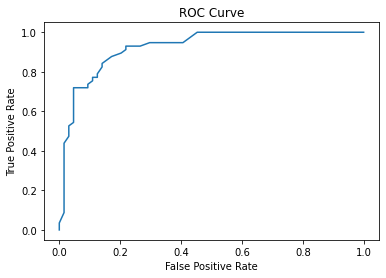

In [63]:
plt.title('ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.savefig("ROC_Curve.png")

In [64]:
df.to_csv("heart1_df.csv")

In [1]:
from sklearn.metrics import EuclideanDistance
import pickle 

pickle.dump(knn_model, open("model12.pkl","wb"))

NameError: name 'knn_model' is not defined

In [66]:
#https://towardsdatascience.com/project-predicting-heart-disease-with-classification-machine-learning-algorithms-fd69e6fdc9d6